In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [2]:
import configparser

Config = configparser.ConfigParser()

Config.read('settings.cfg')

def ConfigSectionMap(section):
    dict1 = {}
    options = Config.options(section)
    for option in options:
        try:
            dict1[option] = Config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1



dir_sanofi_share = ConfigSectionMap("SectionOne")['sanofi']
dir_local = ConfigSectionMap("SectionOne")['local']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [44]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'
path = dir_IP_21

Files = []
df = []
df_count = pd.DataFrame()

for filename in os.listdir( path ):
    if filename.endswith('_PCS.csv'):
        Files.append(filename)

Files.sort(key=str.lower)

# Loop through all the files.
for filename in Files:
    file_path = os.path.join(path, filename)
    # print (filename)
    df = pd.read_csv(file_path)
    df['Filename'] = filename
    df_count = df_count.append(df)


In [69]:
df_count['Filename'].value_counts()

tabIP21Data_36630901_CNTR_GOOD_PCS.csv    216549
tabIP21Data_36630901_CNTRB_PCS.csv         26006
tabIP21Data_36630901_CNTRB_ZA_PCS.csv      18939
Name: Filename, dtype: int64

In [49]:
df_good=df_count[df_count['Filename']=='tabIP21Data_36630901_CNTR_GOOD_PCS.csv']
df_good['IP_TREND_TIME'] = pd.to_datetime(df_good['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_good=df_good.set_index('IP_TREND_TIME')
df_good = df_good.sort_index()
df_good['Production']=0

C:\Users\Raza-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Filename
IP_TREND_TIME,,,,,
2021-08-01 00:08:09.500,36630901_CNTR_GOOD_PCS,93064,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
2021-08-01 00:18:09.400,36630901_CNTR_GOOD_PCS,93064,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
2021-08-01 00:28:09.200,36630901_CNTR_GOOD_PCS,93064,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
2021-08-01 00:28:57.300,36630901_CNTR_GOOD_PCS,93080,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
2021-08-01 00:28:58.300,36630901_CNTR_GOOD_PCS,93096,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
...,...,...,...,...,...
2021-08-19 20:19:26.300,36630901_CNTR_GOOD_PCS,415683,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
2021-08-19 20:19:28.400,36630901_CNTR_GOOD_PCS,415699,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv
2021-08-19 20:19:29.400,36630901_CNTR_GOOD_PCS,415715,Good,Good,tabIP21Data_36630901_CNTR_GOOD_PCS.csv


In [51]:
i=0
for x in df_good.index:
    if i==0:
        i=i+1
    else:
        df_good['Production'][i]=df_good['IP_TREND_VALUE'][i]-df_good['IP_TREND_VALUE'][i-1]
        
        i=i+1    
    



C:\Users\Raza-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df_good_min = df_good.resample('60S').sum()

In [71]:
df_bad=df_count[df_count['Filename']=='tabIP21Data_36630901_CNTRB_PCS.csv']
df_bad['IP_TREND_TIME'] = pd.to_datetime(df_bad['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_bad=df_bad.set_index('IP_TREND_TIME')
df_bad = df_bad.sort_index()
df_bad['Production']=0

C:\Users\Raza-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
i=0
for x in df_bad.index:
    if i==0:
        i=i+1
    else:
        df_bad['Production'][i]=df_bad['IP_TREND_VALUE'][i]-df_bad['IP_TREND_VALUE'][i-1]
        
        i=i+1    
    

C:\Users\Raza-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
df_bad_min = df_bad.resample('60S').sum()

df_prod=df_good_min.join(df_bad_min,how='outer',lsuffix='_Good',rsuffix='_Bad')
df_prod=df_prod.fillna(0)
df_prod['Production_Total']=df_prod['Production_Good']+df_prod['Production_Bad']

In [95]:
df_prod

,IP_TREND_VALUE_Good,Production_Good,IP_TREND_VALUE_Bad,Production_Bad,Production_Total
IP_TREND_TIME,,,,,
2021-08-01 00:07:00,0.0,0.0,304.0,0.0,0.0
2021-08-01 00:08:00,93064.0,0.0,0.0,0.0,0.0
2021-08-01 00:09:00,0.0,0.0,0.0,0.0,0.0
2021-08-01 00:10:00,0.0,0.0,0.0,0.0,0.0
2021-08-01 00:11:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-08-19 20:15:00,12834135.0,494.0,11783.0,2.0,496.0
2021-08-19 20:16:00,12020022.0,463.0,5893.0,1.0,464.0
2021-08-19 20:17:00,9542677.0,368.0,0.0,0.0,368.0


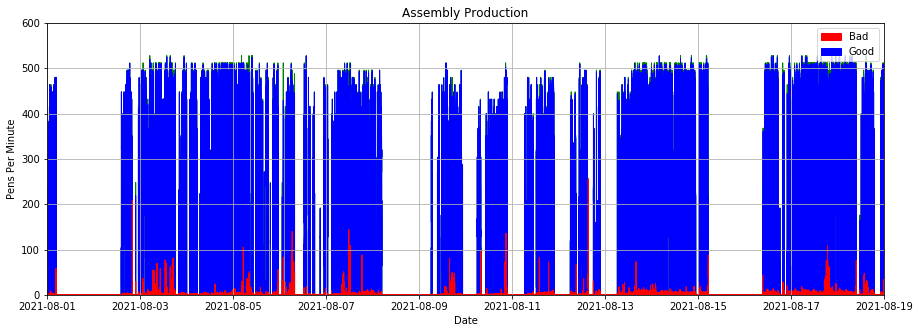

In [102]:
    xdata=df_prod.index
    ydata=df_prod['Production_Good']
    ydata2=df_prod['Production_Bad']
    ydata3=df_prod['Production_Total']
    
    fig = plt.figure(figsize=[15,5])
    ax = plt.subplot(111)
    
    
    
    

    # set properties
    ax.set_xlabel('Date')
    ax.set_ylabel('Pens Per Minute')
    ax.set_title('Assembly Production')
    
    # set the limits
    ax.set_xlim([datetime.date(2021, 8, 1), datetime.date(2021, 8, 19)])
    ax.set_ylim(0,600)
    
    # set the grid on
    ax.grid('on')
    
    l = ax.fill_between(xdata, ydata3,color='green')
    
    l = ax.fill_between(xdata, ydata,color='blue')
    
    l = ax.fill_between(xdata, ydata2,color='red')
    
    red_patch = mpatches.Patch(color='red', label='Bad')
    blue_patch = mpatches.Patch(color='blue', label='Good')
    plt.legend(handles=[red_patch,blue_patch])

In [108]:
ydata3.value_counts()

 0.0         16220
 480.0         660
 464.0         608
 448.0         559
 432.0         559
             ...  
-423984.0        1
-54016.0         1
 488.0           1
 184.0           1
-621344.0        1
Name: Production_Total, Length: 66, dtype: int64

In [109]:
group = df_prod.groupby([pd.Grouper(freq='60min')]).mean()

In [110]:
group

,IP_TREND_VALUE_Good,Production_Good,IP_TREND_VALUE_Bad,Production_Bad,Production_Total
IP_TREND_TIME,,,,,
2021-08-01 00:00:00,9.167604e+04,14.132075,46.113208,0.056604,14.188679
2021-08-01 01:00:00,2.081704e+06,322.100000,357.316667,1.100000,323.200000
2021-08-01 02:00:00,1.836572e+06,243.083333,255.516667,0.650000,243.733333
2021-08-01 03:00:00,1.050007e+06,127.216667,125.600000,0.250000,127.466667
2021-08-01 04:00:00,1.966811e+06,220.200000,414.916667,2.866667,223.066667
...,...,...,...,...,...
2021-08-19 16:00:00,6.811068e+06,319.716667,1507.600000,0.283333,320.000000
2021-08-19 17:00:00,6.736618e+06,298.516667,2269.150000,0.416667,298.933333
2021-08-19 18:00:00,8.850843e+06,372.900000,2184.900000,0.433333,373.333333


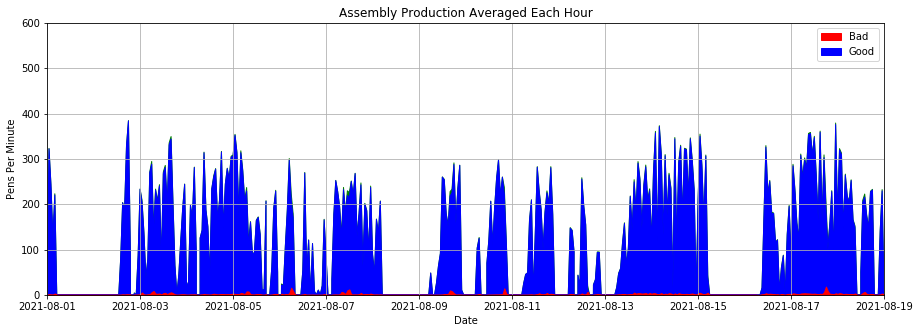

In [112]:
    xdata=group.index
    ydata=group['Production_Good']
    ydata2=group['Production_Bad']
    ydata3=group['Production_Total']
    
    fig = plt.figure(figsize=[15,5])
    ax = plt.subplot(111)
    
    
    
    

    # set properties
    ax.set_xlabel('Date')
    ax.set_ylabel('Pens Per Minute')
    ax.set_title('Assembly Production Averaged Each Hour')
    
    # set the limits
    ax.set_xlim([datetime.date(2021, 8, 1), datetime.date(2021, 8, 19)])
    ax.set_ylim(0,600)
    
    # set the grid on
    ax.grid('on')
    
    l = ax.fill_between(xdata, ydata3,color='green')
    
    l = ax.fill_between(xdata, ydata,color='blue')
    
    l = ax.fill_between(xdata, ydata2,color='red')
    
    red_patch = mpatches.Patch(color='red', label='Bad')
    blue_patch = mpatches.Patch(color='blue', label='Good')
    plt.legend(handles=[red_patch,blue_patch])